In [1]:
import matplotlib.pyplot as plt
import numpy as np

# igual ao 32 mas a 3D

In [2]:
def lista_vizinhos(nmax):
    listav=-np.ones((nmax**3,6))    #indices dos vizinhos de cada estado 
                                    #comeca a -1 para nao confundir com o de indice 0
    nv=np.zeros(nmax**3)            #numero de vizinhos de cada estado

    for i in range(nmax**3):
        nz= i // (nmax**2)
        nx= (i % (nmax**2))%nmax
        ny= (i % (nmax**2))//(nx+1)

        # vizinho 1
        nz1=nz
        nx1=nx+1
        ny1=ny 
        if nx1 < nmax:
            iv = nx1+nmax*ny1+nz1*nmax**2
            listav[i,int(nv[i])]=iv
            nv[i]+=1
        # vizinho 2
        nx1=nx
        ny1=ny+1
        nz1=nz
        if ny1 < nmax:
            iv = nx1+nmax*ny1+nz1*nmax**2
            listav[i,int(nv[i])]=iv
            nv[i]+=1
        # vizinho 3
        nx1=nx-1
        nz1=nz
        ny1=ny 
        if nx1 >= 0:
            iv = nx1+nmax*ny1+nz1*nmax**2
            listav[i,int(nv[i])]=iv
            nv[i]+=1
        # vizinho 4
        nx1=nx
        nz1=nz
        ny1=ny-1
        if ny1 >= 0:
            iv = nx1+nmax*ny1+nz1*nmax**2
            listav[i,int(nv[i])]=iv
            nv[i]+=1

        # vizinho 5
        nx1=nx
        nz1=nz+1
        ny1=ny 
        if nz1 < nmax:
            iv = nx1+nmax*ny1+nz1*nmax**2
            listav[i,int(nv[i])]=iv
            nv[i]+=1
        # vizinho 6
        nx1=nx
        ny1=ny
        nz1=nz-1
        if nz1 >= 0:
            iv = nx1+nmax*ny1+nz1*nmax**2
            listav[i,int(nv[i])]=iv
            nv[i]+=1

    return (listav,nv)


In [3]:
print(lista_vizinhos(2))

(array([[ 1.,  2.,  4., -1., -1., -1.],
       [ 3.,  0.,  5., -1., -1., -1.],
       [ 5.,  2.,  8., -1., -1., -1.],
       [ 2.,  1.,  7., -1., -1., -1.],
       [ 5.,  6.,  0., -1., -1., -1.],
       [ 7.,  4.,  1., -1., -1., -1.],
       [ 9.,  6.,  4., -1., -1., -1.],
       [ 6.,  5.,  3., -1., -1., -1.]]), array([3., 3., 3., 3., 3., 3., 3., 3.]))


In [4]:
def metropolis(T,nequi,nmedidas,N,nmax):

    #(1)
    nk=np.zeros(nmax**3)
    nk[0]=N     # todas no 1o estado
    E=3*N
    estado_particula=np.ones(nmax**3)

    #(2)
    Emedio=0
    E2medio=0
    nkmed=np.zeros(nmax**3)

    lista_viz,nvs = lista_vizinhos(nmax)
    npassos=nequi+nmedidas
    for t in range(npassos):
        for act in range(N):
            # escolher uma particula
            ip = np.random.randint(N)
            ik = int(estado_particula[ip])
            # escolha do vizinho
            iv = np.random.randint(nvs[ik])
            ikv = int(lista_viz[ik,iv])
            #calculo da variacao da energia

            nz= ik // (nmax**2)
            nx= (ik % (nmax**2))%nmax
            ny= (ik % (nmax**2))//(nx+1)

            nzv= ikv // (nmax**2)
            nxv= (ikv % (nmax**2))%nmax
            nyv= (ikv % (nmax**2))//(nxv+1)

            dE = (nxv**2+nyv**2+nzv**2) - (nx**2+ny**2+nz**2)

            pA=np.minimum(1,nvs[ik]*(nk[ikv]+1)/(nvs[ikv]*nk[ik])*np.exp(-dE/T)) ## preciso alterar com +2 e +1 nos nks???
            if np.random.rand() <=pA:
                E += dE
                nk[ik] -= 1
                nk[ikv] += 1
            

        if t>nequi:
            Emedio +=E
            E2medio +=E**2
            nkmed += nk
    Emedio /= nmedidas
    E2medio /= nmedidas
    nkmed /= nmedidas


    return (Emedio,E2medio,nkmed)

In [5]:
nmax=10 #60
N=50 #200
nmedidas=10000 #20000
nequi=2000

# nTs=10 #30
Tc=N**(2/3)*3.31/(2*np.pi)**2

Ts= np.arange(Tc/10,Tc,Tc/10)
nTs=len(Ts)

Emeds=np.zeros(nTs)
E2meds=np.zeros(nTs)
Cv=np.zeros(nTs)
z=np.zeros(nTs)
f0=np.zeros(nTs)
nkmed=np.zeros(nmax**3)

for i in range(nTs):
    print("Simulação",i+1,"T/Tc",Ts[i]/Tc)
    Emeds[i],E2meds[i],nkmed = metropolis(Ts[i],nequi,nmedidas,N,nmax)
    Cv[i]=(E2meds[i]-Emeds[i]**2)/(Ts[i]**2)
    z[i]=np.exp(0/Ts[i])*nkmed[0]/(nkmed[0]+1)
    f0[i]=nkmed[0]/N



Simulação 1 T/Tc 0.1
<ipython-input-4-c539f53fea50>:36: RuntimeWarning: divide by zero encountered in double_scalars
  pA=np.minimum(1,nvs[ik]*(nk[ikv]+1)/(nvs[ikv]*nk[ik])*np.exp(-dE/T)) ## preciso alterar com +2 e +1 nos nks???
Simulação 2 T/Tc 0.2
Simulação 3 T/Tc 0.30000000000000004
Simulação 4 T/Tc 0.4
Simulação 5 T/Tc 0.5
Simulação 6 T/Tc 0.6
Simulação 7 T/Tc 0.7000000000000001
Simulação 8 T/Tc 0.8
Simulação 9 T/Tc 0.9000000000000001


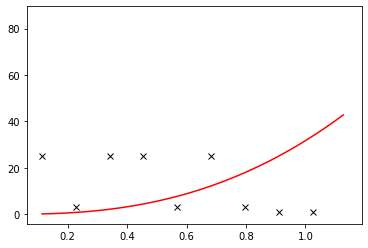

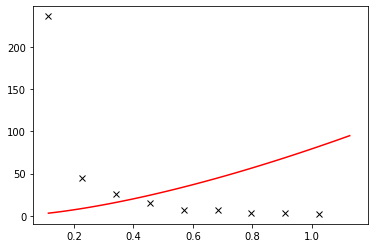

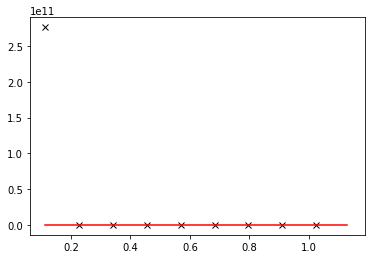

In [7]:
T=np.linspace(Tc/10,Tc,100)

Emt1=N*Tc*0.7701*(T[T<Tc]/Tc)**(5/2) ## a T baixas
Emt2=N*3/2*T[T>=Tc] ## a T altas

Cvt1= 1.925*N*(T[T<Tc]/Tc)**(3/2) ## a T baixas
Cvt2= 3/2*N*np.ones(len(T[T>=Tc])) ## a T altas

Zt1= np.ones(len(T[T<Tc])) ## a T baixas
Zt2= 2.612*(T[T>=Tc]/Tc)**(3/2) ## a T altas

f0t=np.zeros(len(T))
for i in range(len(T)):
    x=T[i]
    if x<Tc:
        f0t[i]=1-(x/Tc)**(3/2)

plt.figure(1)
plt.plot(Ts,Emeds-3*N,'kx',T[T<Tc],Emt1,'r-',T[T>=Tc],Emt2,'b-')
plt.figure(2)
plt.plot(Ts,Cv,'kx',T[T<Tc],Cvt1,'r-',T[T>=Tc],Cvt2,'b-')
plt.figure(3)
plt.plot(Ts,z,'kx',T[T<Tc],Zt1,'r-',T[T>=Tc],Zt2,'b-')



plt.show()